# Periodic Variables

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [143]:
thetas = np.random.randint(0, 360, size=10)

In [169]:
x = thetas * np.pi / 180

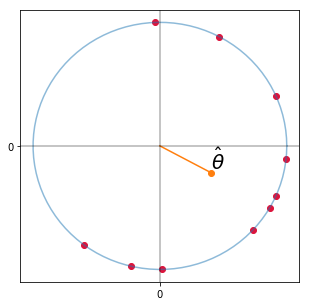

In [171]:
x = np.deg2rad(thetas)


rs = np.linspace(0, 2 * np.pi, 100)

vcos = np.cos(x)
vsin = np.sin(x)

plt.figure(figsize=(5, 5))
plt.plot(np.cos(rs), np.sin(rs), alpha=0.5)
plt.scatter(vcos, vsin, c="crimson")
plt.scatter(vcos.mean(), vsin.mean(), c="tab:orange")
plt.plot((0, vcos.mean()), (0, vsin.mean()), c="tab:orange")
plt.text(vcos.mean(), vsin.mean(), r"$\hat \theta$", fontsize=20,
         horizontalalignment="left",
         verticalalignment="bottom");
plt.axvline(x="0", c="black", alpha=0.3)
plt.axhline(y="0", c="black", alpha=0.3);